In [2]:
import pandas as pd
import numpy as np

# Preprocess the dataframe


In [12]:
df = pd.DataFrame({
    "Roll_ID":[412, np.nan, 456, np.nan, 434, 429, 418],
    "Name": ["John","Mitra","Ritz" ,np.nan,"Anny","Hema",np.nan],
    "Marks":[np.nan, 32, 25, np.nan, 35, 28, 38]
})
df

,Roll_ID,Name,Marks
0,412.0,John,NaN
1,NaN,Mitra,32.0
2,456.0,Ritz,25.0
3,NaN,NaN,NaN
4,434.0,Anny,35.0
5,429.0,Hema,28.0
6,418.0,NaN,38.0


In [13]:
df = df[~df.isna().all(axis=1)]
df['Roll_ID'].fillna(0, inplace=True)
df['Name'].fillna('Anonymous', inplace=True)
df['Marks'].fillna(df['Marks'].median(), inplace=True)

df['Roll_ID'] = df['Roll_ID'].astype(int)
df['Marks'] = df['Marks'].astype(int)

df

C:\Users\revan\AppData\Local\Temp\ipykernel_7316\108751100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Roll_ID'].fillna(0, inplace=True)
C:\Users\revan\AppData\Local\Temp\ipykernel_7316\108751100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'].fillna('Anonymous', inplace=True)
C:\Users\revan\AppData\Local\Temp\ipykernel_7316\108751100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marks'].fillna(df['

,Roll_ID,Name,Marks
0,412,John,32
1,0,Mitra,32
2,456,Ritz,25
4,434,Anny,35
5,429,Hema,28
6,418,Anonymous,38


In [15]:
df = df[~df.isna().all(axis=1)]
df["Roll_ID"].fillna(0,inplace=True)
df["Name"].fillna("Anonymous",inplace=True)
df["Marks"].fillna(df["Marks"].median(),inplace=True)

df["Roll_ID"].astype(int)
df["Marks"].astype(int)

df

,Roll_ID,Name,Marks
0,412,John,32
1,0,Mitra,32
2,456,Ritz,25
4,434,Anny,35
5,429,Hema,28
6,418,Anonymous,38


# Max registrations they asked?

In [10]:
df = pd.DataFrame({
    'Date':["2015-12-06", "2011-12-27", "2015-09-07", "2012-12-21", "2020-02-13", "2015-06-09"], 
    'RID':[498, 721, 375, 464, 813, 853], 'Phy':[22, 45, 1, 65, 22, 17], 
    'Chem':[52, 56, 32, 50, 24, 61], 
    'Math':[63, 37, 68, 62, 43 ,42]
    }) 

In [11]:
df

,Date,RID,Phy,Chem,Math
0,2015-12-06,498,22,52,63
1,2011-12-27,721,45,56,37
2,2015-09-07,375,1,32,68
3,2012-12-21,464,65,50,62
4,2020-02-13,813,22,24,43
5,2015-06-09,853,17,61,42


In [21]:
def cal_mean(df, col):
    return round(df[col].mean(),2)

df["Month"] = pd.to_datetime(df["Date"]).dt.month_name().str[:3].str.upper()
df

,Date,RID,Phy,Chem,Math,Month
0,2015-12-06,498,22,52,63,DEC
1,2011-12-27,721,45,56,37,DEC
2,2015-09-07,375,1,32,68,SEP
3,2012-12-21,464,65,50,62,DEC
4,2020-02-13,813,22,24,43,FEB
5,2015-06-09,853,17,61,42,JUN


In [17]:
df["Month"].mode()[0]

'DEC'

In [19]:
most_month = df[df["Month"] == df["Month"].mode()[0]]
most_month

,Date,RID,Phy,Chem,Math,Month
0,2015-12-06,498,22,52,63,DEC
1,2011-12-27,721,45,56,37,DEC
3,2012-12-21,464,65,50,62,DEC


In [23]:
def cal_mean(df, col):
    return round(df[col].mean(),2)

df["Month"] = pd.to_datetime(df["Date"]).dt.month_name().str[:3].str.upper()
most_month = df[df["Month"] == df["Month"].mode()[0]]
pd.Series([
    df["Month"].mode()[0],
    len(most_month), 
    cal_mean(most_month,"Chem"),c
    al_mean(most_month,"Phy"),
    cal_mean(most_month,"Math")
    ])

0      DEC
1        3
2    52.67
3     44.0
4     54.0
dtype: object

# Q9. Org inc

In [25]:
df = pd.DataFrame({
    'access_id': {
        0: 'ORG6684',
        1: '4564',
        2: 'ORG6995',
        3: '2130',
        4: '5839',
        5: 'ORG1281',
        6: 'ORG2651',
        7: 'ORG9870',   
        8: 'ORG4089',
        9: 'ORG3794'
        }})

In [37]:
pd.Series(df["access_id"]).str.extract(r"([ORG])?(\d)",expand=False).isna().sum()[0]

0    3
1    0
dtype: int64

# Q10. Sanity check

In [38]:
df = pd.DataFrame({
    'name': ['elon', 'suzlon', 'keylon', 'dusk'], 
    'username': ['user_spaceboyelon_2022', 'user_suzlon123', 'tothemoon123_2022', 'user_duskmusk_2022']
    })

In [39]:
df

,name,username
0,elon,user_spaceboyelon_2022
1,suzlon,user_suzlon123
2,keylon,tothemoon123_2022
3,dusk,user_duskmusk_2022


In [51]:
((df["username"].str.startswith("user_") & df["username"].str.endswith("2022")) == False).sum()

2

In [4]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2023-02-06 22:38:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_(1).csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.161.245.27, 18.161.245.174, 18.161.245.179, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.161.245.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: 'final_vg.csv'

     0K .......... .......... .......... .......... ..........  2% 1.64M 1s
    50K .......... .......... .......... .......... ..........  5% 3.70M 1s
   100K .......... .......... .......... .......... ..........  7% 4.18M 1s
   150K .......... .......... .......... .......... .......... 10% 9.19M 1s
   200K .......... .......... .......... .......... .......... 12% 8.04M 0s
   250K .......... .......... .......... .......... .......... 15% 12.4M 0s
   300K .......... .......... .......... .......... ..

In [5]:
df = pd.read_csv("final_vg.csv")

NameError: name 'pd' is not defined

In [1]:
import pandas as pd

# StockCode in UK


In [3]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/717/original/sales_dataset.csv?1651728217 -O stockcode.csv

--2023-02-08 22:25:56--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/717/original/sales_dataset.csv?1651728217
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.161.245.134, 18.161.245.27, 18.161.245.174, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.161.245.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94850204 (90M) [text/plain]
Saving to: 'stockcode.csv'

     0K .......... .......... .......... .......... ..........  0% 2.84M 32s
    50K .......... .......... .......... .......... ..........  0% 5.31M 24s
   100K .......... .......... .......... .......... ..........  0% 11.8M 19s
   150K .......... .......... .......... .......... ..........  0% 6.56M 18s
   200K .......... .......... .......... .......... ..........  0% 12.0M 16s
   250K .......... .......... .......... .......... ..........  0% 5.97M 15s
   300K .......... .......... .......... .......... .....

In [4]:
df = pd.read_csv("stockcode.csv")

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [22]:
data = df.groupby("Country")["StockCode"].unique().reset_index()
data

,Country,StockCode
0,Australia,"[22087, 85206A, 21895, 21896, 22083, 21871, 84..."
1,Austria,"[21482, 21481, 85014B, 85014D, 20679, 15056P, ..."
2,Bahrain,"[81950B, 85007, 20902, 20903, 22138, 22311, 22..."
3,Belgium,"[POST, 22212, 79000, 20685, 82600, 21672, 2167..."
4,Bermuda,"[20727, 20728, 22384, 22382, 22383, 22136, 475..."
5,Brazil,"[17084P, 22659, 84406B, 17091A, 21124, 21123, ..."
6,Canada,"[22449, 21506, 20978, 21558, 21967, 22553, 209..."
7,Channel Islands,"[22130, 22218, 22222, 22220, 22215, 22223, 223..."
8,Cyprus,"[21136, 21770, 21164, 21181, 82552, 85150, 851..."
9,Czech Republic,"[22930, 84755, 22216, 21791, 22231, 22250, 844..."


In [32]:
d = data[data["Country"]=="United Kingdom"].index
d

Int64Index([40], dtype='int64')

In [34]:
data["StockCode"][40].shape

(5303,)

# Q4. Most selling Product

In [35]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/715/original/sales_dataset.csv?1651726697 -O Most_selling.csv

--2023-02-08 22:56:55--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/715/original/sales_dataset.csv?1651726697
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.161.245.134, 18.161.245.174, 18.161.245.179, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.161.245.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94850204 (90M) [text/plain]
Saving to: 'Most_selling.csv'

     0K .......... .......... .......... .......... ..........  0% 3.17M 29s
    50K .......... .......... .......... .......... ..........  0% 4.66M 24s
   100K .......... .......... .......... .......... ..........  0% 11.8M 19s
   150K .......... .......... .......... .......... ..........  0% 11.5M 16s
   200K .......... .......... .......... .......... ..........  0% 8.70M 15s
   250K .......... .......... .......... .......... ..........  0% 11.8M 14s
   300K .......... .......... .......... .......... .

In [1]:
import pandas as pd
df = pd.read_csv("Most_selling.csv")

In [2]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.groupby("Description").agg(sum).sort_values(by="Quantity",ascending=False)

,Quantity,Price,Customer ID
Description,,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108545,298.18,14628933.0
WHITE HANGING HEART T-LIGHT HOLDER,93050,18488.35,82666326.0
ASSORTED COLOUR BIRD ORNAMENT,81306,5483.78,42672530.0
JUMBO BAG RED RETROSPOT,78090,8230.47,42448849.0
BROCADE RING PURSE,70700,317.63,6362283.0
...,...,...,...
"Unsaleable, destroyed.",-15644,0.00,0.0
missing,-16467,0.00,0.0
printing smudges/thrown away,-19200,0.00,0.0


In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df["Selling_Price"] = df["Quantity"] * df["Price"]

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Selling_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [9]:
df.groupby(["Customer ID","Invoice"]).agg(max).sort_values(by="Selling_Price", ascending=False)

StockCode                          Description  Quantity  \
Customer ID Invoice                                                            
16446.0     581483      23843          PAPER CRAFT , LITTLE BIRDIE     80995   
12346.0     541431      23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
15098.0     556444      22502       PICNIC BASKET WICKER 60 PIECES        60   
15838.0     530715      84347  ROTATING SILVER ANGELS T-LIGHT HLDR      9360   
12918.0     502263          M                               Manual         1   
...                       ...                                  ...       ...   
            C502264         M                               Manual        -1   
17399.0     C512770         M                               Manual        -1   
15098.0     C556445         M                               Manual        -1   
12346.0     C541433     23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
16446.0     C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   

                             InvoiceDate     Price         Country  \
Customer ID Invoice                                                  
16446.0     581483   2011-12-09 09:15:00      2.08  United Kingdom   
12346.0     541431   2011-01-18 10:01:00      1.04  United Kingdom   
15098.0     556444   2011-06-10 15:28:00    649.50  United Kingdom   
15838.0     530715   2010-11-04 11:36:00      1.69  United Kingdom   
12918.0     502263   2010-03-23 15:22:00  10953.50  United Kingdom   
...                                  ...       ...             ...   
            C502264  2010-03-23 15:24:00  10953.50  United Kingdom   
17399.0     C512770  2010-06-17 16:52:00  25111.09  United Kingdom   
15098.0     C556445  2011-06-10 15:31:00  38970.00  United Kingdom   
12346.0     C541433  2011-01-18 10:17:00      1.04  United Kingdom   
16446.0     C581484  2011-12-09 09:27:00      2.08  United Kingdom   

                     Selling_Price  
Customer ID Invoice                 
16446.0     581483       168469.60  
12346.0     541431        77183.60  
15098.0     556444        38970.00  
15838.0     530715        15818.40  
12918.0     502263        10953.50  
...                            ...  
            C502264      -10953.50  
17399.0     C512770      -25111.09  
15098.0     C556445      -38970.00  
12346.0     C541433      -77183.60  
16446.0     C581484     -168469.60  

[44876 rows x 7 columns]

In [18]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

AttributeError: module 'pandas' has no attribute 'to_string'

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Selling_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Invoice        1067371 non-null  object        
 1   StockCode      1067371 non-null  object        
 2   Description    1062989 non-null  object        
 3   Quantity       1067371 non-null  int64         
 4   InvoiceDate    1067371 non-null  datetime64[ns]
 5   Price          1067371 non-null  float64       
 6   Customer ID    824364 non-null   float64       
 7   Country        1067371 non-null  object        
 8   Selling_Price  1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 73.3+ MB


In [19]:
df["string_date"] = df["InvoiceDate"].to_string()

In [23]:
df["string_date"].str.startswith("2011-06-22").sum()

0

In [24]:
data = pd.read_csv("stockcode.csv")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [32]:
data[data["InvoiceDate"].str.contains("2011-06-22")].nunique()

Invoice         68
StockCode      652
Description    649
Quantity        47
InvoiceDate     63
Price           76
Customer ID     57
Country          8
dtype: int64

In [34]:
data[data['InvoiceDate'].str.contains('2011-06-22')].nunique()

Invoice         68
StockCode      652
Description    649
Quantity        47
InvoiceDate     63
Price           76
Customer ID     57
Country          8
dtype: int64

In [36]:
dff = df[df['Country']=='France']

dff[dff['Quantity']==dff['Quantity'].max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Selling_Price,string_date
298942,518505,21088,SET/6 FRUIT SALAD PAPER CUPS,7128,2010-08-09 13:10:00,0.08,14277.0,France,570.24,0 2009-12-01 07:45:00\n1 2009-...


In [39]:
df[df['Country']=='France']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Selling_Price,string_date
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France,17.40,0 2009-12-01 07:45:00\n1 2009-...
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France,44.55,0 2009-12-01 07:45:00\n1 2009-...
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France,44.55,0 2009-12-01 07:45:00\n1 2009-...
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.0,France,30.60,0 2009-12-01 07:45:00\n1 2009-...
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France,17.85,0 2009-12-01 07:45:00\n1 2009-...
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 2009-12-01 07:45:00\n1 2009-...
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 2009-12-01 07:45:00\n1 2009-...
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 2009-12-01 07:45:00\n1 2009-...
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,0 2009-12-01 07:45:00\n1 2009-...


# KdePlot

In [4]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.DataFrame({
    "Sale_Id":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Selling": [479.99, 1249.99, 649.99, 399.99, 699.99, 1249.99, 1349.99, 999.99, 649.99, 479.99, 1349.99, 1249.99, 649.99, 649.99, 999.99, 399.99, 699.99, 999.99, 399.99, 649.99],
    "Year": [2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019]
})

In [3]:
df

,Sale_Id,Selling,Year
0,1,479.99,2018
1,2,1249.99,2018
2,3,649.99,2018
3,4,399.99,2018
4,5,699.99,2018
5,6,1249.99,2018
6,7,1349.99,2018
7,8,999.99,2018
8,9,649.99,2018
9,10,479.99,2018


<AxesSubplot:xlabel='Year', ylabel='Density'>

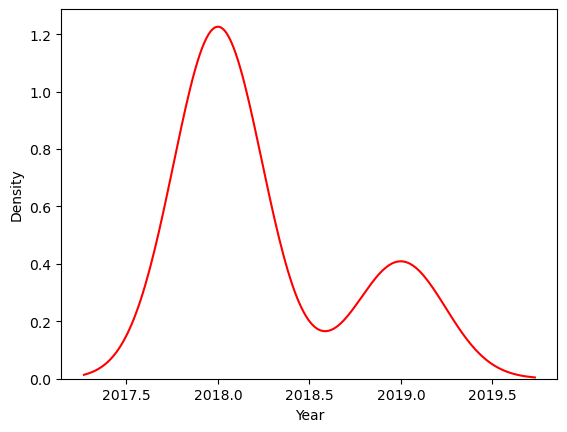

In [7]:
sns.kdeplot(data=df,x="Year",color="red")

# CountPlot

In [8]:
df = pd.DataFrame({
    "Product Type" : ['Desktop', 'Laptop', 'Tablet', 'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Laptop', 'Laptop', 'Tablet', 'Tablet', 'Laptop', 'Laptop', 'Tablet', 'Laptop', 'Laptop', 'Tablet', 'Tablet', 'Desktop'],
    "Source": ['Poster 1', 'Poster 4', 'Poster 4', 'Email', 'Poster 4', 'Poster 2', 'Poster 1', 'Poster 3', 'Poster 4', 'Poster 4', 'Poster 3', 'Poster 3', 'Website', 'Poster 3', 'Poster 2', 'Poster 1', 'Website', 'Website', 'Poster 1', 'Poster 3']
})

<AxesSubplot:xlabel='Source', ylabel='count'>

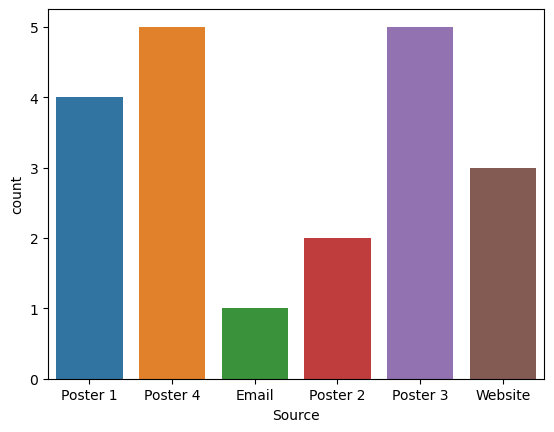

In [9]:
sns.countplot(data=df, x="Source")

In [10]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='sex'>

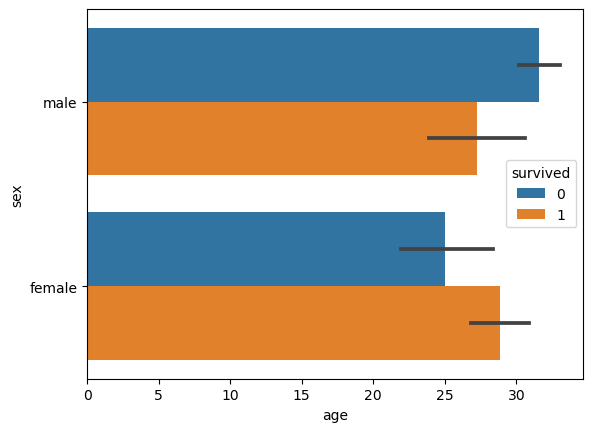

In [17]:
sns.barplot(data=titanic,x="age",y="sex",hue="survived")

<AxesSubplot:xlabel='sex', ylabel='age'>

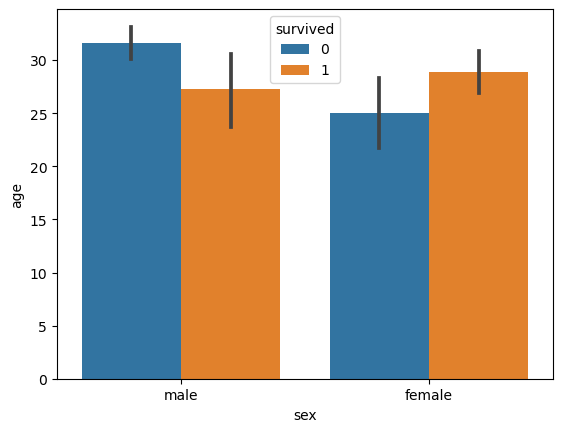

In [18]:
sns.barplot(data=titanic,x="sex",y="age",hue="survived")

<AxesSubplot:xlabel='sex', ylabel='age'>

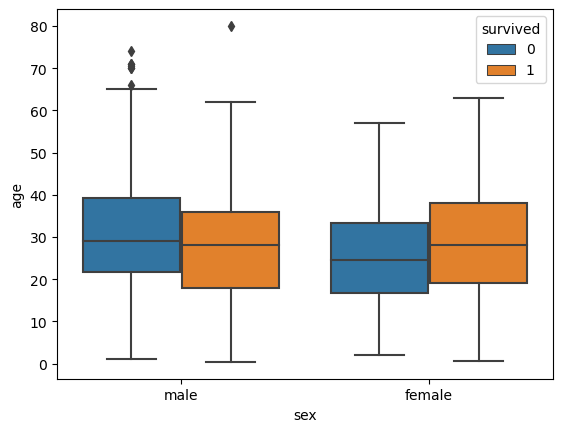

In [19]:
sns.boxplot(data=titanic,x="sex",y="age",hue="survived")

<AxesSubplot:xlabel='sex', ylabel='Count'>

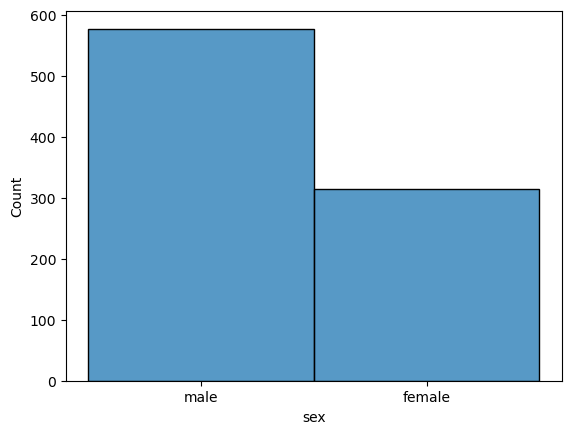

In [21]:
sns.histplot(data=titanic,x="sex")

In [4]:
import numpy as np
import pandas as pd
arr1 = np.array([10,52,62,16,16,54,453])
arr2 = np.array([100,90,80,70,60,50,40])
arr2[np.argsort(arr1)][3]

90

In [5]:
df = pd.DataFrame({
    "Roll_ID":[412, np.nan, 456, np.nan, 434, 429, 418],
    "Name": ["John","Mitra","Ritz" ,np.nan,"Anny","Hema",np.nan],
    "Marks":[np.nan, 32, 25, np.nan, 35, 28, 38]
})
df

,Roll_ID,Name,Marks
0,412.0,John,NaN
1,NaN,Mitra,32.0
2,456.0,Ritz,25.0
3,NaN,NaN,NaN
4,434.0,Anny,35.0
5,429.0,Hema,28.0
6,418.0,NaN,38.0


In [9]:
df.iloc[:2,:3]

,Roll_ID,Name,Marks
0,412.0,John,NaN
1,NaN,Mitra,32.0


In [8]:
df.loc[:2,"Roll_ID":"Marks"]

,Roll_ID,Name,Marks
0,412.0,John,NaN
1,NaN,Mitra,32.0
2,456.0,Ritz,25.0


In [11]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.vstack((arr,arr[[2],:]))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [7, 8, 9]])

In [13]:
arr = np.arange(9).reshape(3,3)
np.split(arr,[1,3],axis=1)[1].shape

(3, 2)

In [14]:
df

,Roll_ID,Name,Marks
0,412.0,John,NaN
1,NaN,Mitra,32.0
2,456.0,Ritz,25.0
3,NaN,NaN,NaN
4,434.0,Anny,35.0
5,429.0,Hema,28.0
6,418.0,NaN,38.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("final_vg.csv")

In [4]:
data["Year"]


0        1985.0
1        2007.0
2        2012.0
3        2006.0
4        2006.0
          ...  
16647    2012.0
16648    2013.0
16649    2013.0
16650    2008.0
16651    2013.0
Name: Year, Length: 16652, dtype: float64

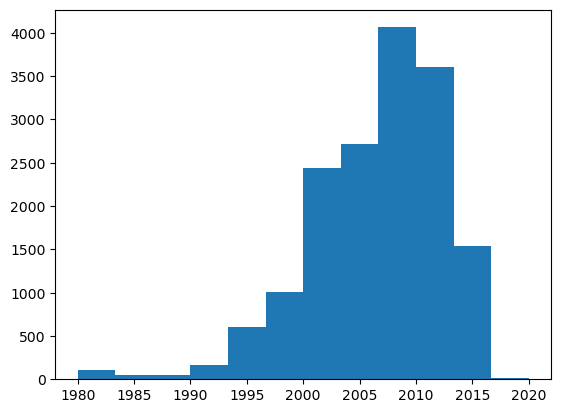

In [5]:
plt.hist(data["Year"], bins=12)
plt.show()

In [17]:
top3_pub = data['Publisher'].value_counts().index[:3] 
top3_gen = data['Genre'].value_counts().index[:3] 
top3_plat = data['Platform'].value_counts().index[:3] 
top3_data = data.loc[(data["Publisher"].isin(top3_pub)) & (data["Platform"].isin(top3_plat)) & (data['Genre'].isin(top3_gen))] 
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


In [19]:
import seaborn as sns

<AxesSubplot:xlabel='Publisher', ylabel='count'>

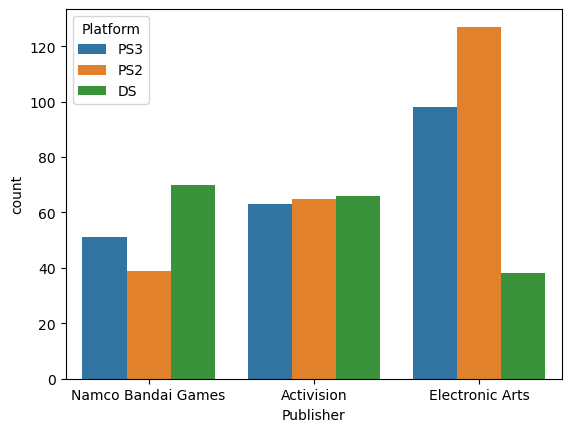

In [23]:
sns.countplot(data = top3_data,x="Publisher",hue="Platform")

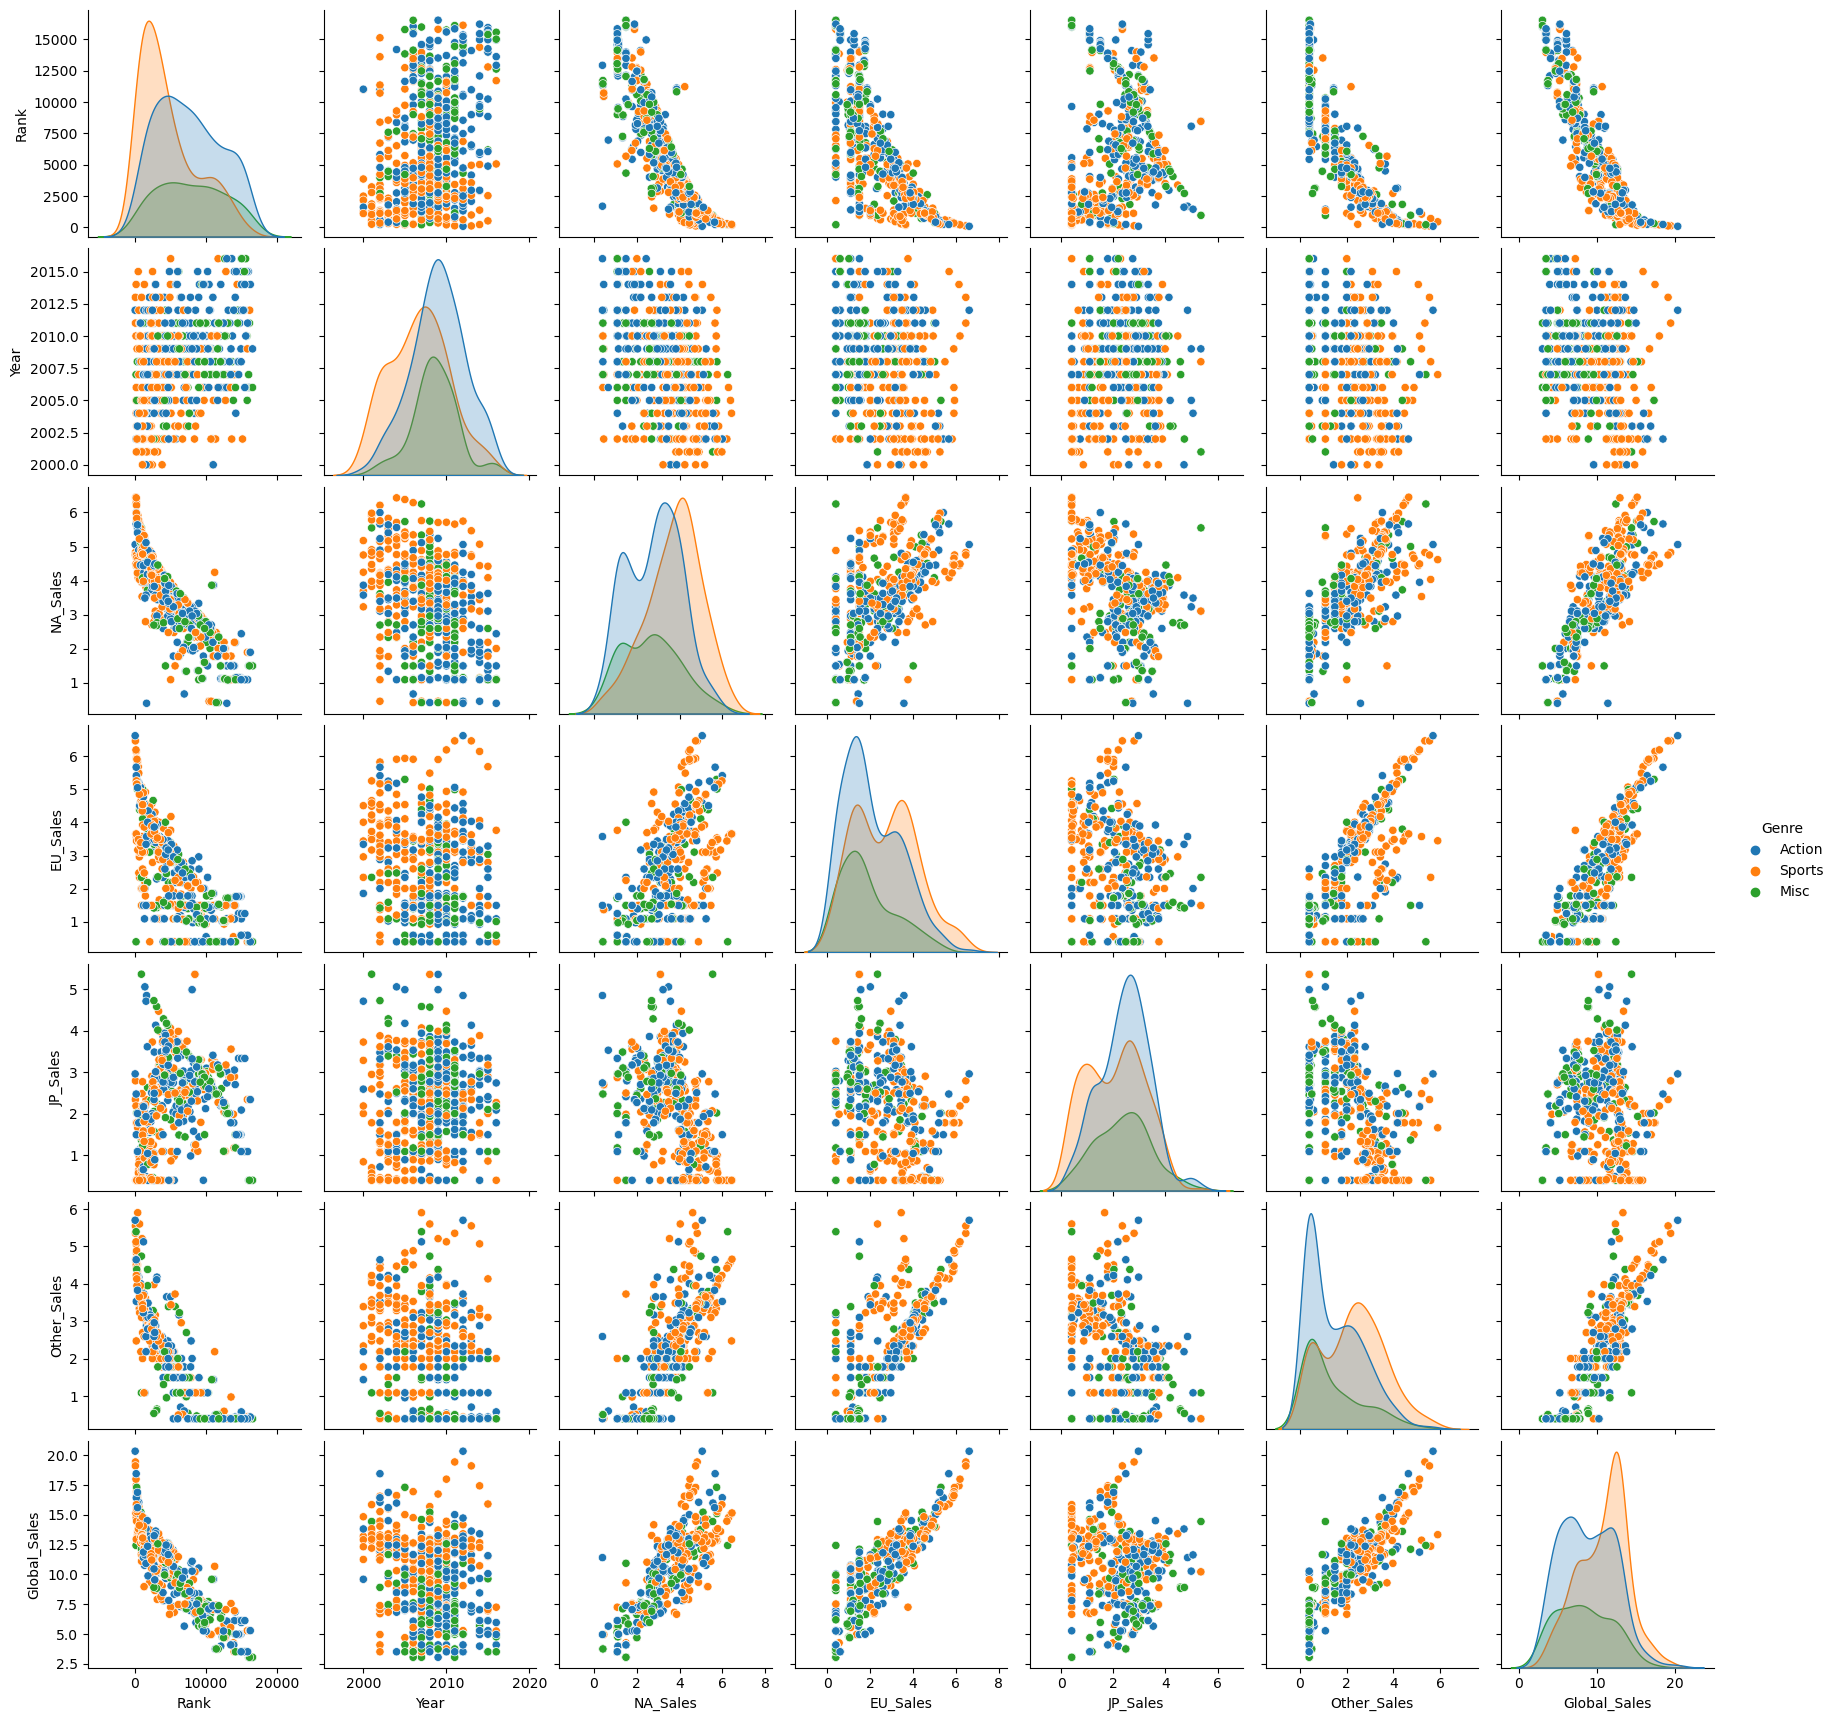

In [26]:
sns.pairplot(data=top3_data,hue="Genre")

<AxesSubplot:>

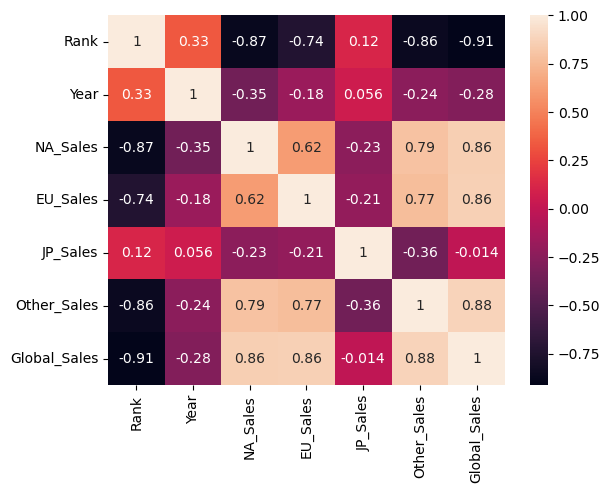

In [37]:
sns.heatmap(top3_data.corr(),annot=True)

In [1]:
import seaborn as sns
df = sns.load_dataset("titanic")

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='count'>

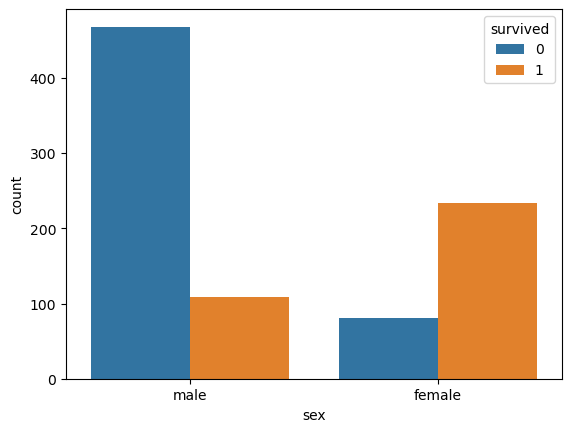

In [6]:
sns.countplot(data=df,x="sex",hue="survived")

<AxesSubplot:xlabel='age'>

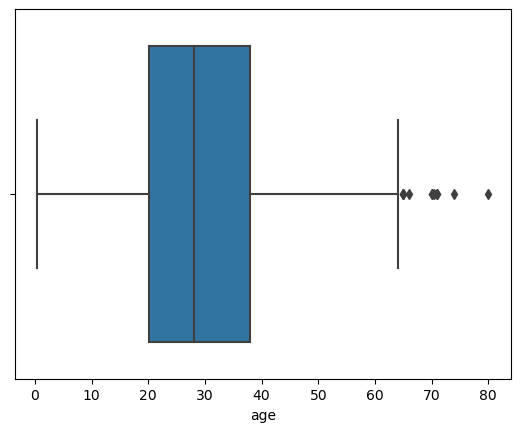

In [13]:
sns.boxplot(data=df,x="age")

<AxesSubplot:xlabel='age', ylabel='sex'>

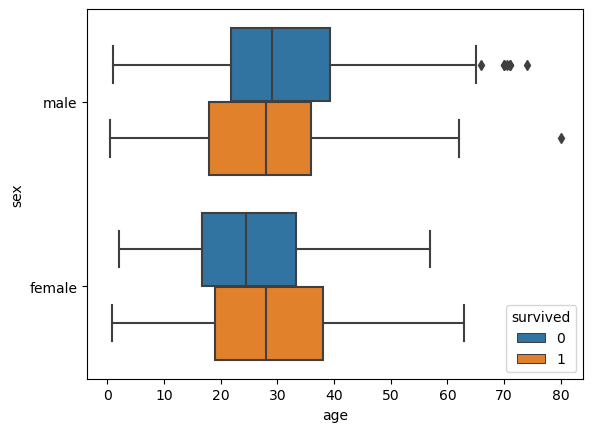

In [14]:
sns.boxplot(data=df,x="age",y="sex",hue="survived")

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df["alone"] = df["alone"].map({False:0,True:1})

In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,1


<AxesSubplot:xlabel='survived', ylabel='age'>

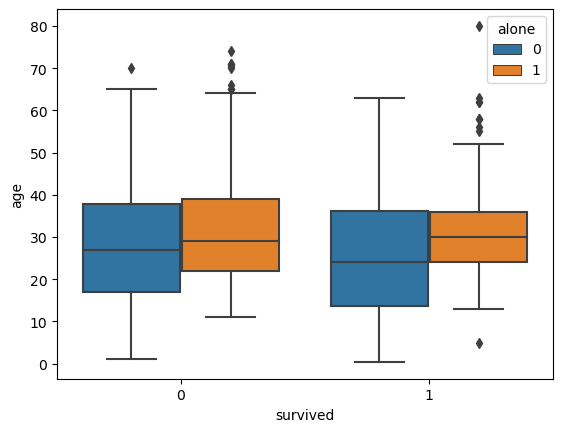

In [23]:
sns.boxplot(data=df,x="survived",y="age",hue="alone")

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1


<AxesSubplot:xlabel='class', ylabel='count'>

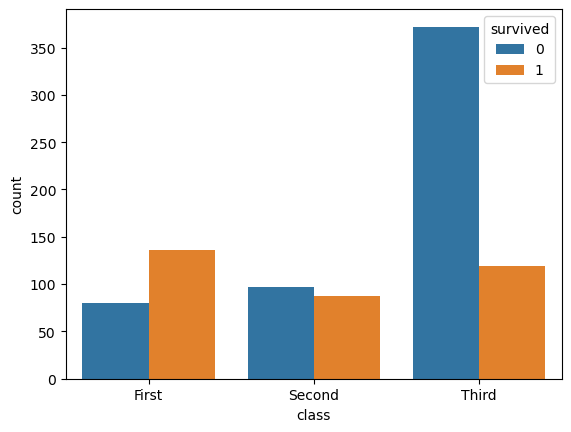

In [29]:
sns.countplot(data=df,x="class",hue="survived")

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("WA_Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='PaymentMethod', ylabel='MonthlyCharges'>

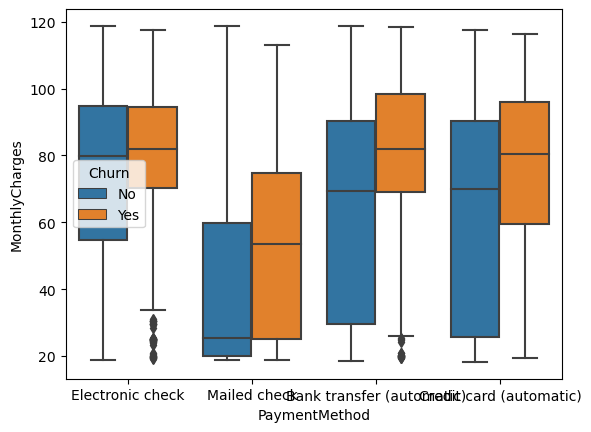

In [34]:
sns.boxplot(data=df,x="PaymentMethod",y="MonthlyCharges",hue="Churn")

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

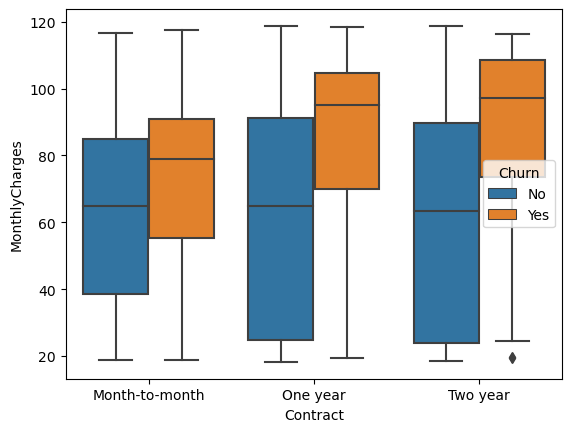

In [36]:
sns.boxplot(data=df,x="Contract",y="MonthlyCharges",hue="Churn")

In [38]:
df = pd.DataFrame({
    "Sale_id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Source" : ['Website', 'Poster 4', 'Website', 'Website', 'Poster 4', 'Poster 2', 'Email', 'Website', 'Email', 'Poster 2'],
    "Profit" : [2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018]
})
df

,Sale_id,Source,Profit
0,1,Website,2018
1,2,Poster 4,2018
2,3,Website,2018
3,4,Website,2018
4,5,Poster 4,2018
5,6,Poster 2,2018
6,7,Email,2018
7,8,Website,2018
8,9,Email,2018
9,10,Poster 2,2018


<AxesSubplot:xlabel='Source', ylabel='Profit'>

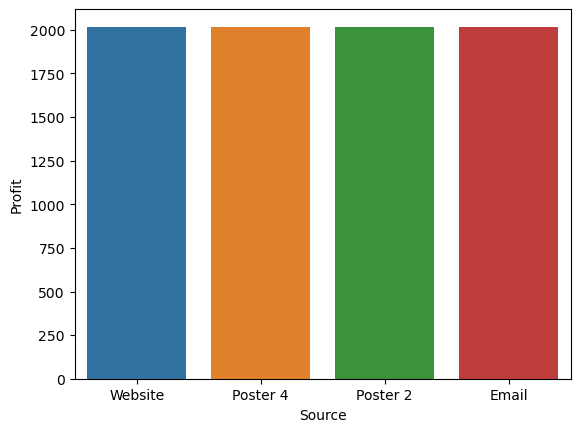

In [39]:
sns.barplot(data=df, x = "Source",y="Profit")

In [40]:
df = pd.DataFrame({
    "Sale_id" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Selling Price" : [479.99, 1249.99, 649.99, 399.99, 699.99, 1249.99, 1349.99, 999.99, 649.99, 479.99, 1349.99, 1249.99, 649.99, 649.99, 999.99, 399.99, 699.99, 999.99, 399.99, 649.99],
    "Profit" : [143.39, 230.89, 118.64, 72.09, 98.09, 230.89, 180.34, 146.69, 122.34, 143.39, 180.34, 230.89, 122.34, 118.64, 146.69, 72.09, 98.09, 146.69, 72.09, 122.34]
})
df

,Sale_id,Selling Price,Profit
0,1,479.99,143.39
1,2,1249.99,230.89
2,3,649.99,118.64
3,4,399.99,72.09
4,5,699.99,98.09
5,6,1249.99,230.89
6,7,1349.99,180.34
7,8,999.99,146.69
8,9,649.99,122.34
9,10,479.99,143.39


In [42]:
import matplotlib.pyplot as plt

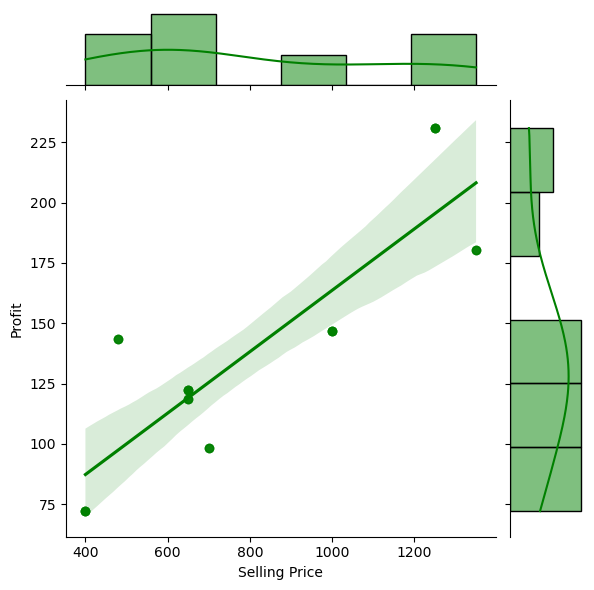

In [45]:
sns.jointplot(data=df,x="Selling Price",y="Profit",kind="reg",color="green")

In [47]:
df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [48]:
df.shape

(271116, 15)

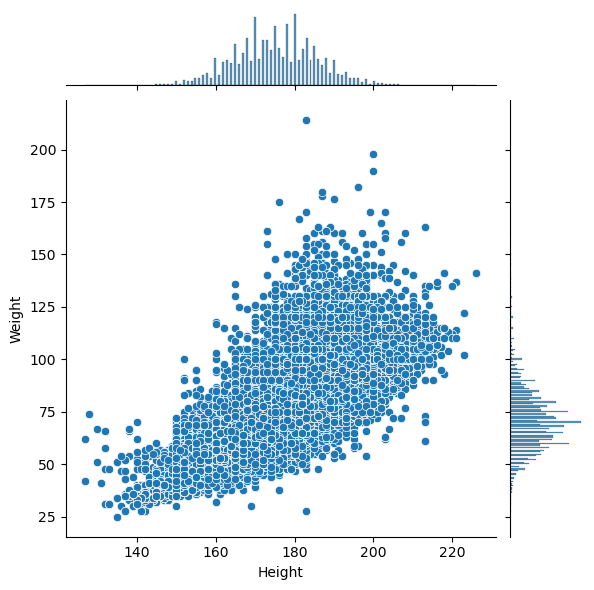

In [50]:
sns.jointplot(data=df,x="Height",y="Weight",kind="scatter")

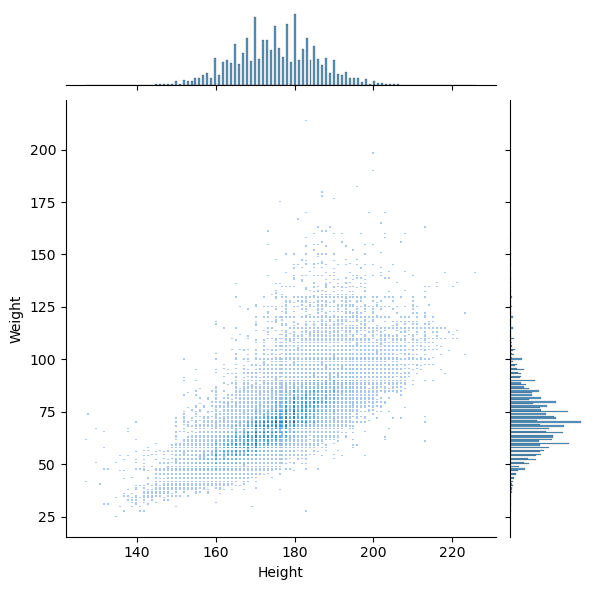

In [51]:
sns.jointplot(data=df,x="Height",y="Weight",kind="hist")

In [52]:
sns.jointplot(data=df,x="Height",y="Weight",kind="kde")

Text(0.5, 1.0, 'distribution of major prod sales')

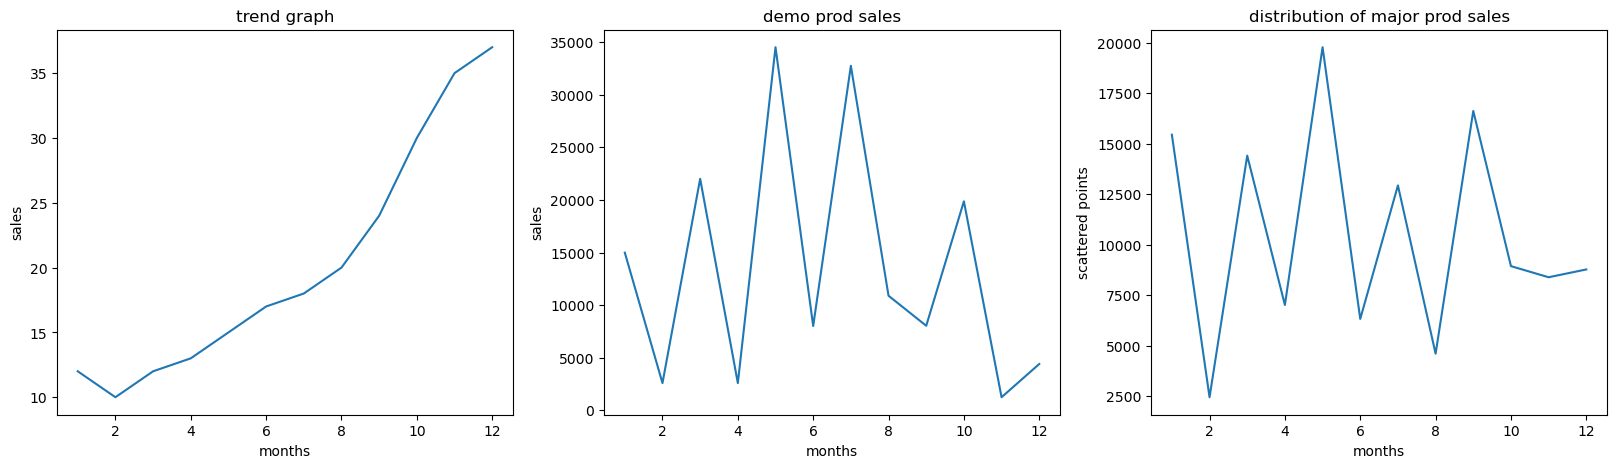

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = eval(input())
y = eval(input())
y1 = eval(input())
y2 = eval(input())

df = pd.DataFrame({'month_number': x, 'mean_sales': y, 'demo_prod': y1, 'major_prod':y2})

# Set the fig size and fig value
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Plot first subplot
ax[0].plot(df['month_number'], df['mean_sales'])
ax[0].set_xlabel('months')
ax[0].set_ylabel('sales')
ax[0].set_title('trend graph')

# Plot second subplot
ax[1].plot(df['month_number'], df['demo_prod'])
ax[1].set_xlabel('months')
ax[1].set_ylabel('sales')
ax[1].set_title('demo prod sales')

# Plot third subplot
ax[2].plot(df['month_number'], df['major_prod'])
ax[2].set_xlabel('months')
ax[2].set_ylabel('scattered points')
ax[2].set_title('distribution of major prod sales')